In [3]:
# 1. Data Setup

In [3]:
import pymysql

In [4]:
import seaborn as sns

In [6]:
from matplotlib import  pyplot as plt
import pandas as pd
import numpy as np

In [7]:
connection=pymysql.connect(host="127.0.0.1",user="root",password="Siddhi@2610",database="minicap")

In [8]:
query = "SELECT * FROM crime_data where Vict_Age>30"

In [9]:
pd.read_sql(query,connection)

C:\Users\siddh\AppData\Local\Temp\ipykernel_25524\3456975137.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query,connection)


,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
2,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
3,200100510,01-05-2020,01-05-2020,Central,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,PARKING LOT,IC,800 S OLIVE ST,34.06,-118.24
4,200100514,01-05-2020,01-05-2020,Central,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",41,M,HOTEL,AA,700 W 7TH ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,200106600,02-06-2020,02-06-2020,Central,624,BATTERY - SIMPLE ASSAULT,56,F,SIDEWALK,IC,4200 S WESTERN AV,34.04,-118.24
257,200106606,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,75,F,SIDEWALK,IC,600 EXPOSITION BL,34.04,-118.24
258,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
259,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25


In [12]:
df=pd.read_sql(query,connection)

C:\Users\siddh\AppData\Local\Temp\ipykernel_1620\3823902772.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,connection)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Vict_Age', ylabel='Count'>

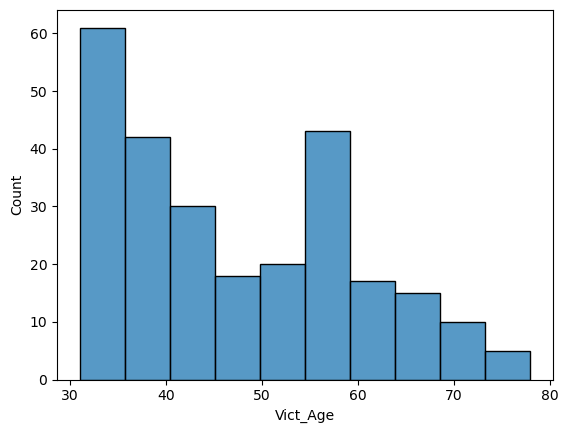

In [13]:
sns.histplot(df["Vict_Age"])

In [14]:
## 3. Data Exploration
## Basic Statistics:

In [25]:
query = "SELECT COUNT(*) AS total_records, COUNT(DISTINCT Crm_Cd) AS unique_crime_codes FROM crime_data;"
stats = pd.read_sql(query, connection)
print(stats)

   total_records  unique_crime_codes
0            499                  42


C:\Users\siddh\AppData\Local\Temp\ipykernel_1620\3908039431.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  stats = pd.read_sql(query, connection)


In [67]:
## Distinct Crime Codes:



In [103]:
query = "SELECT DISTINCT Crm_Cd, Crm_Cd_Desc FROM crime_data;"
df = pd.read_sql(query, connection)
print(df)


    Crm_Cd                                        Crm_Cd_Desc
0      624                           BATTERY - SIMPLE ASSAULT
1      745           VANDALISM - MISDEAMEANOR ($399 OR UNDER)
2      740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
3      442           SHOPLIFTING - PETTY THEFT ($950 & UNDER)
4      946                          OTHER MISCELLANEOUS CRIME
5      341  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...
6      330                              BURGLARY FROM VEHICLE
7      930             CRIMINAL THREATS - NO WEAPON DISPLAYED
8      648                                              ARSON
9      354                                  THEFT OF IDENTITY
10     230     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
11     761                                    BRANDISH WEAPON
12     350                                      THEFT, PERSON
13     310                                           BURGLARY
14     480                                      BIKE - STOLEN
15     6

C:\Users\siddh\AppData\Local\Temp\ipykernel_27964\1133213215.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [17]:
data = pd.read_sql(query,connection)

C:\Users\siddh\AppData\Local\Temp\ipykernel_25524\184896066.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query,connection)


In [19]:
data['Date_Rptd'] = pd.to_datetime(data['Date_Rptd'], format='%m-%d-%Y')
data['DATE_OCC'] = pd.to_datetime(data['DATE_OCC'],format='%m-%d-%Y')

In [27]:
query = "select Date_Rptd,DATE_OCC from crime_data"
df=pd.read_sql(query,connection)
print(df)


      Date_Rptd    DATE_OCC
0    01-08-2020  01-08-2020
1    01-02-2020  01-01-2020
2    01-01-2020  01-01-2020
3    01-01-2020  01-01-2020
4    01-02-2020  01-02-2020
..          ...         ...
494  02-07-2020  02-07-2020
495  02-07-2020  02-07-2020
496  02-07-2020  02-07-2020
497  02-07-2020  01-10-2020
498  02-07-2020  02-03-2020

[499 rows x 2 columns]


C:\Users\siddh\AppData\Local\Temp\ipykernel_25524\2681287376.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,connection)


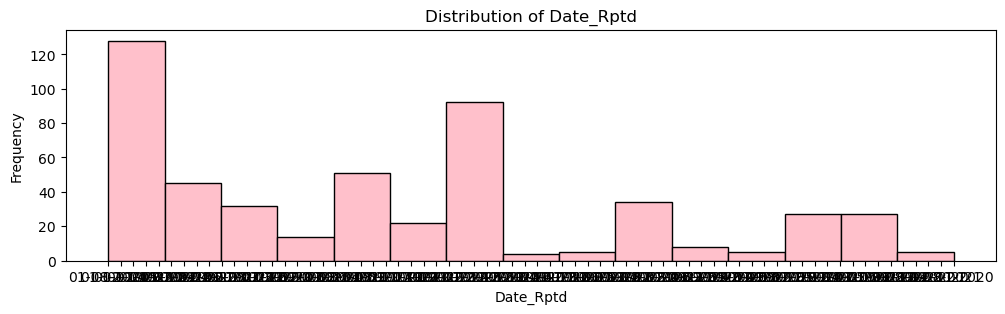

In [25]:
plt.figure(figsize=(12,3))
plt.hist(df.Date_Rptd,edgecolor='Black', color='Pink',bins=15)
plt.xlabel('Date_Rptd')
plt.ylabel('Frequency')
plt.title('Distribution of Date_Rptd')
plt.show()

In [71]:
query = "select * from crime_data"
data=pd.read_sql(query,connection)
print(data)

         DR_NO   Date_Rptd    DATE_OCC    AREA_NAME  Crm_Cd  \
0     10304468  01-08-2020  01-08-2020    Southwest     624   
1    190101086  01-02-2020  01-01-2020      Central     624   
2    191501505  01-01-2020  01-01-2020  N Hollywood     745   
3    191921269  01-01-2020  01-01-2020      Mission     740   
4    200100502  01-02-2020  01-02-2020      Central     442   
..         ...         ...         ...          ...     ...   
494  200106614  02-07-2020  02-07-2020      Central     624   
495  200106615  02-07-2020  02-07-2020      Central     624   
496  200106616  02-07-2020  02-07-2020      Central     624   
497  200106617  02-07-2020  01-10-2020      Central     510   
498  200106618  02-07-2020  02-03-2020      Central     745   

                                           Crm_Cd_Desc  Vict_Age Vict_Sex  \
0                             BATTERY - SIMPLE ASSAULT        36        F   
1                             BATTERY - SIMPLE ASSAULT        25        M   
2           

C:\Users\siddh\AppData\Local\Temp\ipykernel_25524\1248428556.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data=pd.read_sql(query,connection)


## Questions 

# 1. Spatial Analysis:

## Where are the geographical hotspots for reported crimes?

In [73]:
df = data.dropna(subset=['LAT', 'LON'])


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


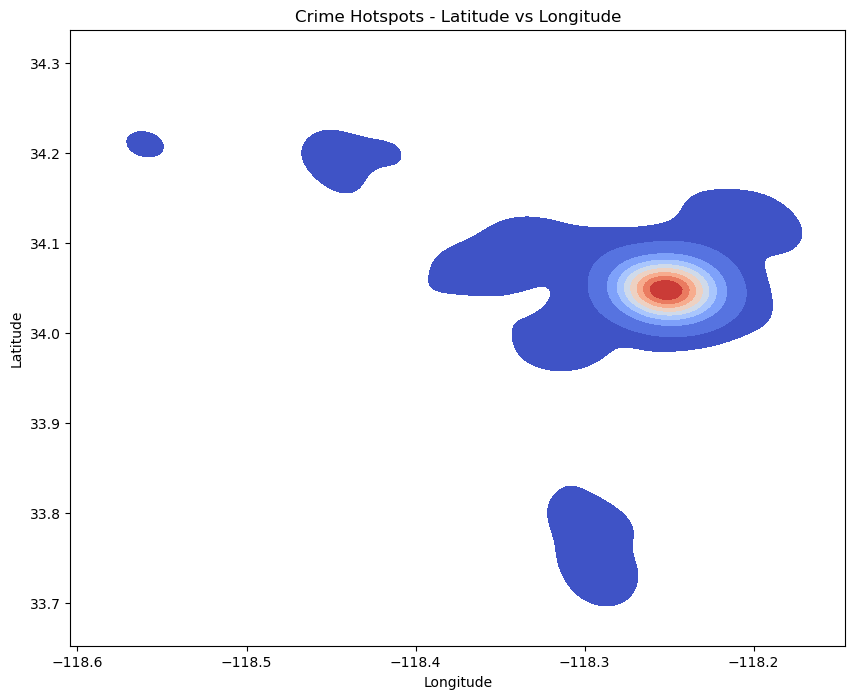

In [77]:
plt.figure(figsize=(10, 8))
sns.kdeplot(x=df['LON'], y=df['LAT'], cmap='coolwarm', fill=True, thresh=0.05)

# Customize the plot
plt.title('Crime Hotspots - Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 2. Victim Demographics:

## What is the distribution of victim ages in reported crimes?

ims?

In [85]:
query="select Vict_Age,Vict_Sex from crime_data"
df=pd.read_sql(query,connection)
print(pd)

<module 'pandas' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\pandas\\__init__.py'>


C:\Users\siddh\AppData\Local\Temp\ipykernel_25524\3130558161.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,connection)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


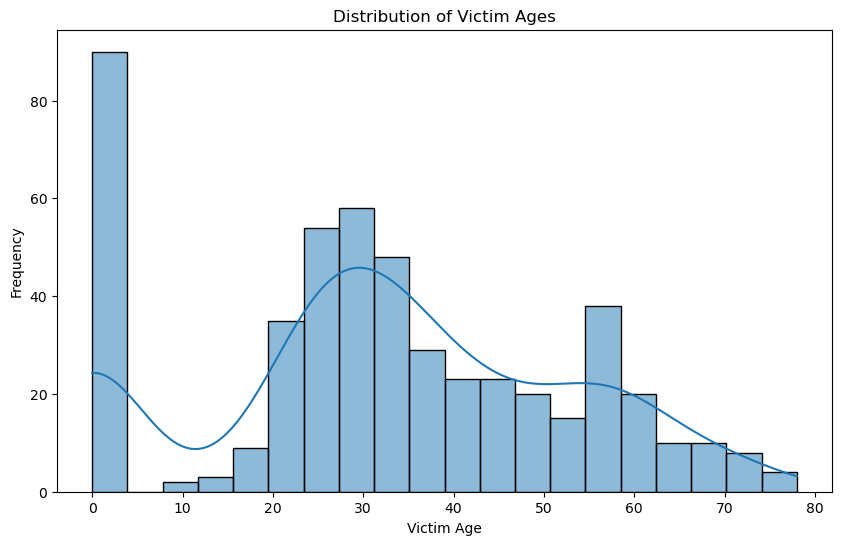

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(df.Vict_Age, bins=20, kde=True)
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.title('Distribution of Victim Ages')
plt.show()

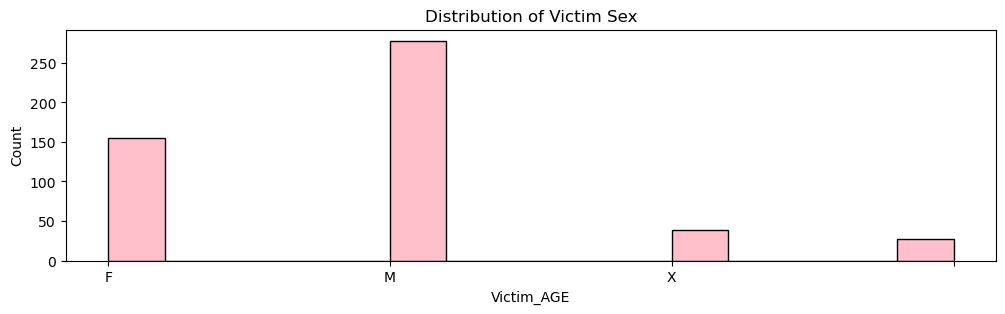

In [87]:
plt.figure(figsize=(12,3))
plt.hist(df.Vict_Sex,edgecolor='Black', color='Pink',bins=15)
plt.xlabel('Victim_AGE')
plt.ylabel('Count')
plt.title('Distribution of Victim Sex')
plt.show()

### 7. Status Analysis:

   - Examine the status of reported crimes.

   - Classify crimes based on their current status.



In [53]:
query="select Status, Crm_Cd from crime_data"
df=pd.read_sql(query,connection)
print(df)

    Status  Crm_Cd
0       AO     624
1       IC     624
2       IC     745
3       IC     740
4       IC     442
..     ...     ...
494     IC     624
495     IC     624
496     IC     624
497     IC     510
498     IC     745

[499 rows x 2 columns]


C:\Users\siddh\AppData\Local\Temp\ipykernel_25524\140512338.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,connection)


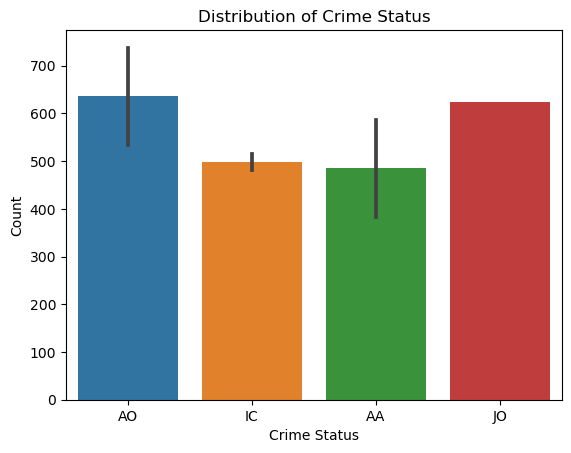

In [59]:
sns.barplot(x='Status',y='Crm_Cd', data=df)
plt.xlabel('Crime Status')
plt.ylabel('Count')
plt.title('Distribution of Crime Status')
plt.show()

## 3. Location Analysis:
Question: Where do most crimes occur based on the "Location" column?

Group by Location and count the number of crimes at each location.

In [99]:
query="select Location from crime_data"
df=pd.read_sql(query,connection)
print(df)

               Location
0        1100 W 39TH PL
1         700 S HILL ST
2       5400 CORTEEN PL
3        14400 TITUS ST
4     700 S FIGUEROA ST
..                  ...
494   2400 ELLENDALE PL
495             39TH PL
496    2500 W VERNON AV
497   700 EXPOSITION BL
498  2600 S FIGUEROA ST

[499 rows x 1 columns]


C:\Users\siddh\AppData\Local\Temp\ipykernel_25524\261980788.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,connection)


In [101]:
location_data = df['Location'].value_counts().reset_index()
location_data.columns = ['Location', 'Count']

In [103]:
top_locations = location_data.head(10)
print(top_locations)

             Location  Count
0    800 N ALAMEDA ST     14
1        700 W 7TH ST     11
2  1100 S FIGUEROA ST      6
3        300 E 5TH ST      6
4                 6TH      6
5        100 E 5TH ST      5
6     600 S SPRING ST      5
7  500 S SAN PEDRO ST      5
8              7TH ST      5
9     700 S FLOWER ST      4


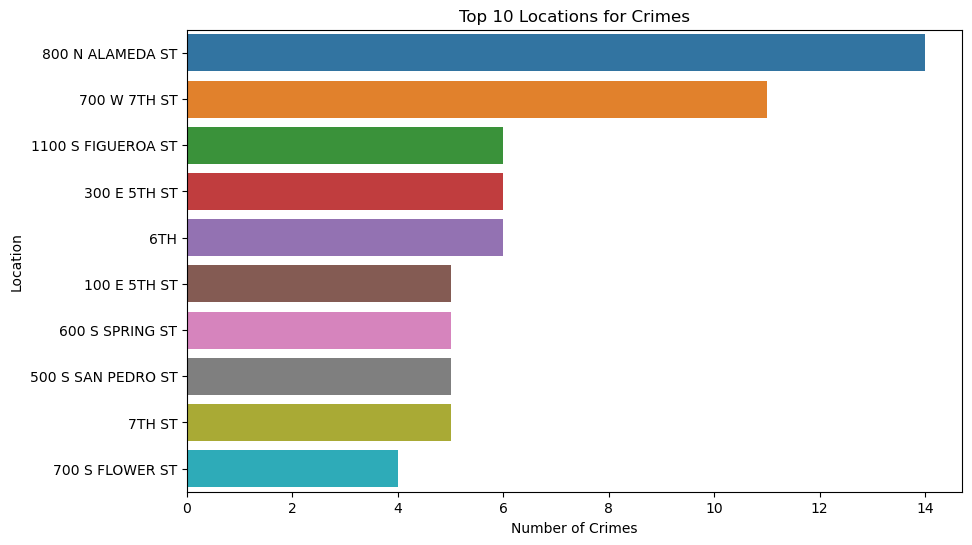

In [105]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Location', data=top_locations)
plt.xlabel('Number of Crimes')
plt.ylabel('Location')
plt.title('Top 10 Locations for Crimes')
plt.show()

# Crime Code Analysis:
## 
What is the distribution of reported crimes based on Crime Code?

 

In [124]:
query = """
SELECT Crm_Cd AS Crime_Code, COUNT(*) AS Count
FROM crime_data
GROUP BY Crm_Cd
ORDER BY Count DESC
LIMIT 10;  -- This will give you the top 10 crime codes
"""
df=pd.read_sql(query, connection)
print(df)


   Crime_Code  Count
0         330     82
1         624     74
2         440     44
3         442     28
4         510     28
5         341     26
6         230     24
7         745     23
8         740     23
9         888     19


C:\Users\siddh\AppData\Local\Temp\ipykernel_25524\386764378.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query, connection)


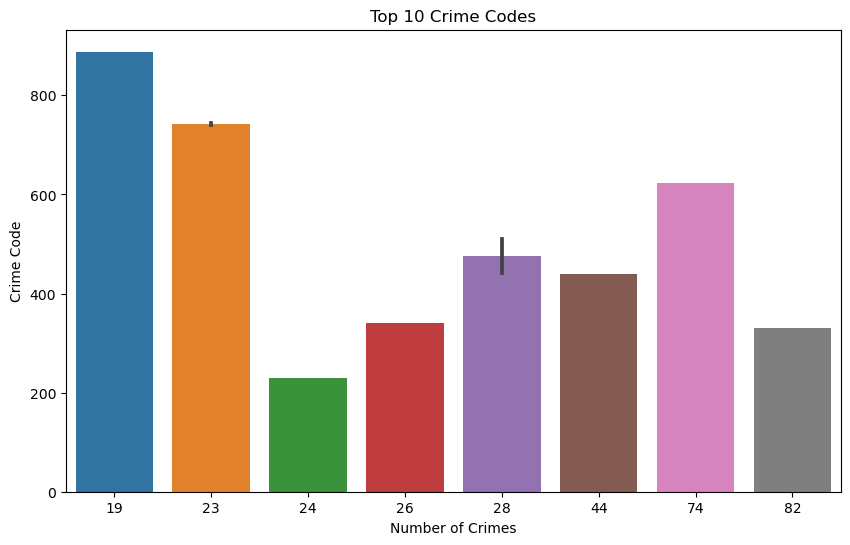

In [128]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Crime_Code', data=df)
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Code')
plt.title('Top 10 Crime Codes')
plt.show()